# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [30]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df1 = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [31]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df1['Dia'] = pd.to_datetime(df1['Dia'])
# df1.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [32]:
df1

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

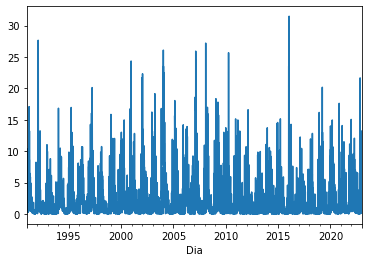

In [33]:
df1['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Anomalia mensal

Anomalia = Valor observado - Climatologia

In [34]:
# Acumulado mensal.
chuva_acumulada = df1.resample('MS').sum()

# Formata a data de forma a remover o dia.
chuva_acumulada.index = chuva_acumulada.index.strftime('%Y-%m')

# Renomeia o index de 'Dia' para 'Mes'.
chuva_acumulada.index.name = 'Mes'

chuva_acumulada

,Chuva
Mes,
1991-01,100.099646
1991-02,79.893940
1991-03,164.202329
1991-04,71.712449
1991-05,56.974305
...,...
2022-08,35.391962
2022-09,14.892078
2022-10,16.885503


In [35]:
# Uso do reshape para organizar o dado no formato vetor para o formato tabular (linhas x colunas).
# 32 = anos.
# 12 = meses.

dado_reshape = chuva_acumulada['Chuva'].values.reshape(32,12)

# Nome dos rótulos das colunas.
colunas = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Nome dos rótulos do index.
index = range(1991, 2023)

# Cria o DataFrame.
df2 = pd.DataFrame(
    data=dado_reshape, 
    index=index, 
    columns=colunas
)

df2

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
1991,100.099646,79.893940,164.202329,71.712449,56.974305,26.477652,12.856383,14.162914,4.031318,5.157082,72.598380,40.504320
1992,219.365838,146.837050,89.832540,73.233083,11.459463,24.571975,21.251295,6.829009,13.757358,16.847679,45.421162,71.895308
1993,49.076026,54.951604,55.997140,48.910159,27.047003,14.300651,15.272164,7.003137,7.962822,21.911219,28.046429,36.357286
1994,113.659772,100.130545,176.620997,109.186761,62.264040,71.403966,30.487092,6.763389,8.827073,8.378450,28.984001,57.135119
1995,67.111676,110.128860,131.431263,148.319529,103.969422,29.755495,28.987825,6.343277,3.320883,15.852721,77.894939,80.272415
1996,75.620965,85.704758,147.965641,161.022716,53.885691,28.335045,16.862794,17.105372,7.448889,20.105777,93.265490,35.514211
1997,125.218679,65.670997,250.012930,116.590857,59.936182,15.083758,18.377229,11.314254,3.000110,32.169334,33.424680,54.426581
1998,110.865513,57.572249,74.942890,32.091287,17.635043,16.528275,16.960138,11.296472,2.924803,6.543128,74.763913,57.237045
1999,80.350378,85.277602,150.435405,55.227839,84.036904,17.328327,19.017814,17.067169,21.352269,39.673623,86.691563,120.673901
2000,109.138180,143.464437,110.721965,136.306123,39.746944,38.314618,33.246495,26.505228,25.393209,8.040904,89.847907,121.982460


In [36]:
df2.loc[1991]

Jan    100.099646
Fev     79.893940
Mar    164.202329
Abr     71.712449
Mai     56.974305
Jun     26.477652
Jul     12.856383
Ago     14.162914
Set      4.031318
Out      5.157082
Nov     72.598380
Dez     40.504320
Name: 1991, dtype: float64

In [37]:
lista = []
anos = []

for ano in range(1991, 1993):
    anomalia = df2.loc[ano] - climatologia
    lista.append(anomalia)
    anos.append(ano)

In [38]:
df3 = pd.DataFrame(lista, index=anos)

df3

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
1991,-2.340554,-21.535099,35.521952,-29.311627,0.838513,-7.513734,-11.472289,-0.061734,-7.509085,-16.126605,24.433678,-19.643431
1992,116.925638,45.408011,-38.847837,-27.790994,-44.676329,-9.419411,-3.077377,-7.395639,2.216955,-4.436008,-2.743539,11.747557


O stack faz o empilhamento dos anos.

In [39]:
df4 = df3.stack().reset_index()

df4

,level_0,level_1,0
0,1991,Jan,-2.340554
1,1991,Fev,-21.535099
2,1991,Mar,35.521952
3,1991,Abr,-29.311627
4,1991,Mai,0.838513
5,1991,Jun,-7.513734
6,1991,Jul,-11.472289
7,1991,Ago,-0.061734
8,1991,Set,-7.509085
9,1991,Out,-16.126605


Renomeia as colunas.

In [40]:
df4.rename(
    columns={'level_0':'Ano', 
             'level_1':'Mes', 
             0:'Chuva'},
    inplace=True
)

In [41]:
df4

,Ano,Mes,Chuva
0,1991,Jan,-2.340554
1,1991,Fev,-21.535099
2,1991,Mar,35.521952
3,1991,Abr,-29.311627
4,1991,Mai,0.838513
5,1991,Jun,-7.513734
6,1991,Jul,-11.472289
7,1991,Ago,-0.061734
8,1991,Set,-7.509085
9,1991,Out,-16.126605


In [42]:
# Dicionário de meses para converte de mês string para mês inteiro (1, 2, ..., 12).

meses = {
    'Jan': 1, 
    'Fev': 2, 
    'Mar': 3, 
    'Abr': 4, 
    'Mai': 5, 
    'Jun': 6, 
    'Jul': 7, 
    'Ago': 8, 
    'Set': 9, 
    'Out': 10, 
    'Nov': 11,
    'Dez': 12
}

Substitui mês string por mes numérico inteiro.

In [43]:
df4['Mes'] = df4['Mes'].replace(meses)

In [44]:
df4

,Ano,Mes,Chuva
0,1991,1,-2.340554
1,1991,2,-21.535099
2,1991,3,35.521952
3,1991,4,-29.311627
4,1991,5,0.838513
5,1991,6,-7.513734
6,1991,7,-11.472289
7,1991,8,-0.061734
8,1991,9,-7.509085
9,1991,10,-16.126605


Cria uma coluna chamada 'Data' no DataFrame. Junta as colunas 'Ano' e 'Mes' para gerar a coluna com a data formatada.

In [45]:
df4['Data'] = pd.to_datetime(
    df4[['Ano', 'Mes']].astype(str).agg(' '.join, axis=1), 
    format='%Y %m'
)

In [46]:
df4

,Ano,Mes,Chuva,Data
0,1991,1,-2.340554,1991-01-01
1,1991,2,-21.535099,1991-02-01
2,1991,3,35.521952,1991-03-01
3,1991,4,-29.311627,1991-04-01
4,1991,5,0.838513,1991-05-01
5,1991,6,-7.513734,1991-06-01
6,1991,7,-11.472289,1991-07-01
7,1991,8,-0.061734,1991-08-01
8,1991,9,-7.509085,1991-09-01
9,1991,10,-16.126605,1991-10-01


In [47]:
# Remove colunas desnecessárias.
df4.drop(
    columns=['Ano', 'Mes'], 
    inplace=True
)

# Define a coluna 'Data' como index.
df4.set_index(
    'Data', 
    inplace=True
)

# Formata a data de forma a remover o dia.
df4.index = df4.index.strftime('%Y-%m')

df4

,Chuva
Data,
1991-01,-2.340554
1991-02,-21.535099
1991-03,35.521952
1991-04,-29.311627
1991-05,0.838513
1991-06,-7.513734
1991-07,-11.472289
1991-08,-0.061734
1991-09,-7.509085


<AxesSubplot:xlabel='Data'>

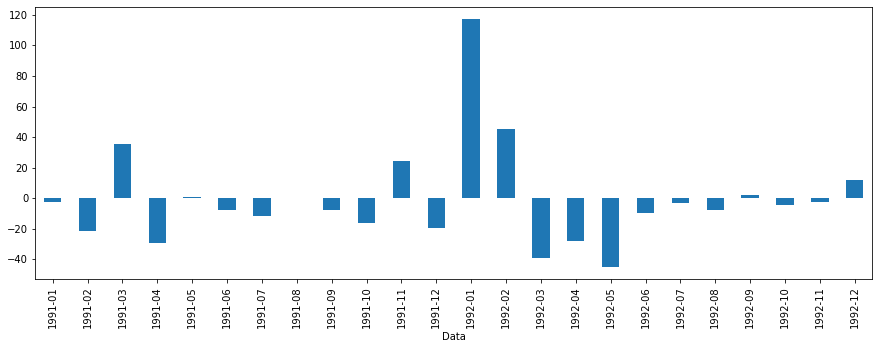

In [48]:
fig, ax = plt.subplots(figsize=(15,5))

df4['Chuva'].plot.bar()